# Análise comparativa entre os itens de projetos culturais
---

**Objetivo:** realizar uma análise comparativa entre os itens de um projeto específico com os itens dos outros projetos culturais de um mesmo segmento. Nesta análise, será investigada a porcentagem de itens de um projeto que estão entre os itens mais frequentes de seu segmento.

#### Importando módulos necessários

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


#### Carregando e mostrando dataset a ser utilizado ao longo do estudo

In [2]:
df = pd.read_csv('data/raw/planilha_orcamentaria.csv')
print(df.columns)
df.head()

Index(['idPronac', 'PRONAC', 'idPlanilhaAprovacao', 'Item', 'idPlanilhaItens',
       'Unidade', 'QtDias', 'QtItem', 'nrOcorrencia', 'VlUnitarioSolicitado',
       'VlTotalSolicitado', 'VlUnitarioAprovado', 'VlTotalAprovado', 'UfItem',
       'MunicipioItem', 'Etapa', 'idArea', 'Area', 'idSegmento', 'Segmento',
       'idProduto', 'Produto', 'DataProjeto'],
      dtype='object')


,idPronac,PRONAC,idPlanilhaAprovacao,Item,idPlanilhaItens,Unidade,QtDias,QtItem,nrOcorrencia,VlUnitarioSolicitado,...,UfItem,MunicipioItem,Etapa,idArea,Area,idSegmento,Segmento,idProduto,Produto,DataProjeto
0,114166,93004,50109,Montagem e desmontagem,88,Serviço,2,1.0,2,140.00,...,PB,Sumé,2 - Produção / Execução,5,Patrimônio Cultural,51,História,62,Exposição de Artes,2009-06-26 09:46:54
1,123461,103228,239572,Locação de Piano,3040,Serviço,12,1.0,6,1500.00,...,RJ,Rio de Janeiro,2 - Produção / Execução,3,Música,33,Música Instrumental,51,Apresentação Musical,2010-05-06 10:49:13
2,123461,103228,239599,Programa,2634,Unidade,6,400.0,6,2.00,...,RJ,Rio de Janeiro,3 - Divulgação / Comercialização,3,Música,33,Música Instrumental,51,Apresentação Musical,2010-05-06 10:49:13
3,132803,1012471,86608,Transporte Local / Locação de Automóvel / Comb...,134,Metro 3 / Km,4,500.0,4,1.45,...,MG,Viçosa,2 - Produção / Execução,7,Artes Integradas,71,Artes Integradas,51,Apresentação Musical,2010-12-21 17:09:22
4,115111,93932,11387,Confecção de painéis explicativos,90,Unidade,30,20.0,1,300.00,...,PE,Recife,2 - Produção / Execução,7,Artes Integradas,71,Artes Integradas,62,Exposição de Artes,2009-07-27 08:40:04


#### Gerando tabela com o número de ocorrências de itens por segmento

In [3]:
items = df[['PRONAC', 'idSegmento', 'idPlanilhaItens']].drop_duplicates()
items_occurrences = items.groupby(['idSegmento', 'idPlanilhaItens']).count()
items_occurrences = items_occurrences.rename(columns={'PRONAC': 'itemOccurrences'})
items_occurrences.head()

itemOccurrences
idSegmento idPlanilhaItens                 
11         10                           517
           12                           591
           13                           757
           14                            12
           15                           511

#### Gerando tabela com o número de projetos por segmento

In [4]:
num_projects = items.drop('idPlanilhaItens', axis=1).set_index('idSegmento').drop_duplicates()
num_projects = num_projects.groupby('idSegmento').count()
num_projects = num_projects.rename(columns={'PRONAC': 'numProjects'})
num_projects.head()

,numProjects
idSegmento,
11,9715
12,2370
13,411
14,126
15,4


## Estudo de caso: análise de um projeto específico
---

Escolheu-se aleatoriamente um projeto cultural para analisar seus itens com relação aos itens mais comuns de seu segmento.

#### Escolhendo um projeto e gerando sua lista de itens

In [5]:
pronac = 90105
project_items = items[items['PRONAC'] == pronac]
project = project_items.iloc[0]
project_items = project_items.drop(columns=['PRONAC', 'idSegmento'])
project_items = project_items.values[:,0]
project_items

array([  12,   72,   81, 1219,   24,   66, 1120,  118,   49,   73,  201,
       2692,  206,  150,  142,   62,   27,   71,   23,   63, 2632,   57,
       1002,   75,   53, 2634,   68, 2667,  179,   83, 1037, 2715, 1050,
       2611, 2631, 2695,   22,   40,  191,  144, 2633,  189,  117, 2639,
         74,  143,   67,   85, 2620,  192,  134,  178,   61, 2605])

#### Obtendo a lista dos itens do segmento do projeto escolhido e ordenando-os por seus números de ocorrências

(1355, 1)


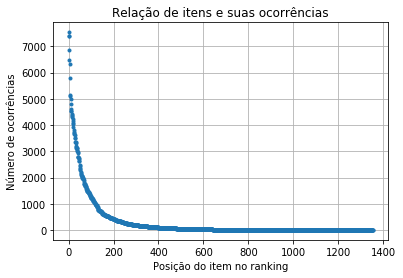

In [6]:
segment = project['idSegmento']
items_segment = items_occurrences.reset_index('idPlanilhaItens').loc[segment]
items_segment = items_segment.reset_index('idSegmento', drop=True)
items_segment = items_segment.set_index('idPlanilhaItens')
items_segment = items_segment.sort_values(by=['itemOccurrences'], ascending=False)
print(items_segment.shape)

plt.plot(items_segment['itemOccurrences'].values, '.')
plt.title('Relação de itens e suas ocorrências')
plt.ylabel('Número de ocorrências')
plt.xlabel('Posição do item no ranking')
plt.grid(True)

#### Obtendo a lista dos itens mais comuns do segmento

In [7]:
top_items_segment = items_segment.iloc[:len(items_segment)//10]
top_items_segment = top_items_segment.drop(columns=['itemOccurrences'])
top_items_segment = top_items_segment.reset_index('idPlanilhaItens')
print(top_items_segment.shape)
top_items_segment.head()

(135, 1)


,idPlanilhaItens
0,142
1,5249
2,191
3,2743
4,53


#### Calculando a porcentagem de itens do projeto escolhido que estão entre os itens mais comuns

In [8]:
found_in_top = sum(top_items_segment.isin(project_items))[0]
total_items = len(project_items)
print('Itens entre os mais ocorridos: {}'.format(found_in_top))
print('Número de itens do projeto: {}'.format(total_items))
print('Razão: %.2f' % (found_in_top / total_items))

Itens entre os mais ocorridos: 44
Número de itens do projeto: 54
Razão: 0.81


## Análise por segmento
---

Escolheu-se aleatoriamente um segmento para analisar a relação entre os itens de cada projeto com os mais comuns do segmento.

#### Definindo funções para encontrar os itens mais comuns de um segmento e calcular as métricas definidas acima

In [9]:
def top_items_segment(segment, percentage=0.1):
    items_segment = items_occurrences.reset_index('idPlanilhaItens').loc[segment]
    items_segment = items_segment.reset_index('idSegmento', drop=True)
    items_segment = items_segment.set_index('idPlanilhaItens')
    items_segment = items_segment.sort_values(by=['itemOccurrences'], ascending=False)
    
    top_items_segment = items_segment.iloc[:int(len(items_segment)*percentage)]
    top_items_segment = top_items_segment.drop(columns=['itemOccurrences'])
    top_items_segment = top_items_segment.reset_index('idPlanilhaItens')

    return top_items_segment

def perc_items_in_top(pronac, top_items_segment):
    project_items = items[items['PRONAC'] == pronac]
    project = project_items.iloc[0]
    project_items = project_items.drop(columns=['PRONAC', 'idSegmento'])
    project_items = project_items.values[:,0]
    
    found_in_top = sum(top_items_segment.isin(project_items))[0]
    total_items = len(project_items)
    
    return found_in_top / total_items

#### Calculando as métricas de porcentagem de itens para todos os projetos do segmento escolhido

In [10]:
segment = '11'
segment_projects = items[items['idSegmento'] == segment]
segment_projects = segment_projects.drop_duplicates(['PRONAC'])
segment_projects = segment_projects['PRONAC'].values
print(len(segment_projects), segment_projects)

percs = []
%time top_items = top_items_segment(segment)
%time percs = [perc_items_in_top(project, top_items) for project in segment_projects]

9715 [ 90105 106516 106667 ... 161772 149328 126912]
CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 19.6 ms
CPU times: user 1min 37s, sys: 120 ms, total: 1min 37s
Wall time: 1min 38s


#### Gerando gráficos dos resultados encontrados

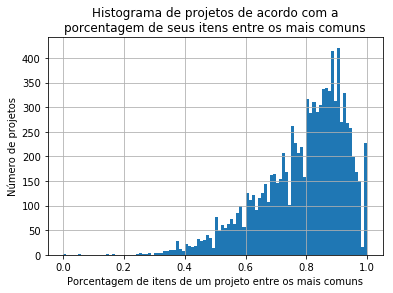

In [11]:
plt.hist(np.array(percs), 100)
plt.title('Histograma de projetos de acordo com a\nporcentagem de seus itens entre os mais comuns')
plt.ylabel('Número de projetos')
plt.xlabel('Porcentagem de itens de um projeto entre os mais comuns')
plt.grid(True)

#### Características da distribuição acima

In [12]:
print('Média: {}'.format(mean(percs)))
print('Desvio padrão: {}'.format(std(percs)))

Média: 0.790463010824482
Desvio padrão: 0.1393999900600478
